In [1]:
from sklearn import svm

# XORの演算結果・学習器に与える入力データ
xor_data = [
    # P, Q, result
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0],
]

# 学習させるためにデータとラベルに分割
data = []
label = []
for row in xor_data:
    p = row[0]
    q = row[1]
    r = row[2]
    data.append([p,q])
    label.append(r)

# データの学習
clf = svm.SVC()
clf.fit(data, label)

# データの予測
pre = clf.predict(data)
print('予測結果:', pre)

# 正解とあっているか確認
ok = 0
total = 0
for idx, answer in enumerate(label):
    p = pre[idx]
    if p == answer: ok += 1
    total += 1

print('正解率:', ok/total)



予測結果: [0 1 1 0]
正解率: 1.0


In [14]:
import pandas as pd
from sklearn import svm, metrics

# XORの演算結果
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0],
]

# 入力を学習データとラベルに分ける
xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.loc[:,[0,1]] # データ2列
xor_label = xor_df.loc[:,2] # ラベル 1列(3列目)

# print
# xor_data
# xor_label

# データの学習と予測
clf = svm.SVC()
clf.fit(xor_data, xor_label)
pre = clf.predict(xor_data)

# 正解率を求める
ac_socere = metrics.accuracy_score(xor_label, pre)
print('正解率：', ac_socere)

正解率： 1.0


In [78]:
from sklearn.datasets import load_iris
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
import random, re
import pandas as pd

iris = load_iris()

# データのシャッフル
# random.shuffle(iris.data)

# データサイズの確認
# print('データサイズ:', iris.data.shape)
# print('ラベルサイズ:', iris.target.shape)

# Dataframe形式でデータ格納
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# データ分割
train, test = train_test_split(df, test_size=0.3, shuffle=True)

# データとラベルに分割
train_data = train.iloc[:,:-1]
train_label = train.iloc[:,-1]
test_data = test.iloc[:,:-1]
test_label = test.iloc[:,-1]

# データの学習と予測
clf = svm.SVC()
clf.fit(train_data,train_label)
pre = clf.predict(test_data)

# 正解率算出
ac_score = metrics.accuracy_score(test_label, pre)
print('正解率：', ac_score)


正解率： 1.0


In [54]:
train.iloc[:,:-1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [39]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## MNISTデータダウンロード

In [80]:
import urllib.request as req
import gzip, os, os.path

savepath = './data/mnist'
baseurl = 'http://yann.lecun.com/exdb/mnist'
file = [
    'train-images-idx3-ubyte.gz',
    'train-labels-idx1-ubyte.gz',
    't10k-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz'
]

# ダウンロード
if not os.path.exists(savepath): # パスが存在しない場合作成
    os.makedirs(savepath)
for f in file:
    url = baseurl + '/' + f
    loc = savepath + '/' + f
    print('download:', url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)

# Gzip解凍
for f in file:
    gz_file = savepath + '/' + f
    raw_file = savepath + '/' + f.replace('.gz', '')
    print('gzip:', f)
    with gzip.open(gz_file, 'rb') as fp: # gzファイル読み込み
        body = fp.read()
        with open(raw_file, 'wb') as w: # gzファイルを読み込んだあとのバイナリーファイルを書き込み
            w.write(body)
print('ok')

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


### MNISTデータについて
- 独自のデータベース形式でデータが格納されている

### MNISTデータをCSV変換

In [82]:
# toCSV
import struct

def to_csv(name, maxdata):
    # ラベルファイルとイメージファイルを開く
    lbl_f = open('./data/mnist/'+ name + '-labels-idx1-ubyte','rb')
    img_f = open('./data/mnist/' + name + '-images-idx3-ubyte', 'rb')
    csv_f = open('./data/mnist/' + name + '.csv', 'w', encoding='utf-8')
    # ヘッダーを読み込む
    mag, lbl_count = struct.unpack('>II', lbl_f.read(8))
    mag, img_count = struct.unpack('>II', img_f.read(8))
    rows, cols = struct.unpack('>II', img_f.read(8))
    pixcels = rows*cols
    #画像データを読み込んでCSVで保存
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack('B', lbl_f.read(1))[0]
        bdata = img_f.read(pixcels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(','.join(sdata)+'\r\n')
        # うまく取り出せたかPGMで保存してテスト
        if idx < 10:
            s = 'P2 28 28 255\n'
            s += ' '.join(sdata)
            iname = './data/mnist/{0}-{1}-{2}.pgm'.format(name,idx,label)
            with open(iname, 'w', encoding='utf-8') as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()

#  出力件数を指定
to_csv('train',1000)
to_csv('t10k', 500)



In [83]:
# MNISTの学習
from sklearn import svm, metrics

# CSVファイルを読み込んで学習データに成形
def load_csv(fname):
    labels = []
    images = []
    with open(fname, 'r') as f:
        for line in f:
            cols = line.split(',')
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0)))
            vals = list(map(lambda n: int(n) / 256, cols))
            images.append(vals)
    return {'labels':labels, 'images':images}

data = load_csv('./data/mnist/train.csv')
test = load_csv('./data/mnist/t10k.csv')

# 学習
clf = svm.SVC()
clf.fit(data['images'], data['labels'])

# 予測
predict = clf.predict(test['images'])

# 結果がどの程度合っていたか確認
ac_score = metrics.accuracy_score(test['labels'], predict)
cl_report = metrics.classification_report(test['labels'], predict)
print('正解率：', ac_score)
print('レポート=')
print(cl_report)

正解率： 0.8842315369261478
レポート=
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.99      1.00      0.99        67
           2       0.91      0.89      0.90        55
           3       0.94      0.72      0.81        46
           4       0.86      0.93      0.89        55
           5       0.75      0.82      0.78        50
           6       0.95      0.81      0.88        43
           7       0.79      0.94      0.86        49
           8       0.94      0.82      0.88        40
           9       0.89      0.87      0.88        54

    accuracy                           0.88       501
   macro avg       0.89      0.88      0.88       501
weighted avg       0.89      0.88      0.88       501



In [1]:
from sklearn import svm, metrics
import glob, os.path, re, json

# テキストを読んで出現頻度を調べる
def check_freq(fname):
    name = os.path.basename(fname)
    lang = re.match(r'^[a-z]{2,}', name).group() # 各ファイル名の先頭2文字が言語を表しているため
    with open(fname, 'r', encoding='utf-8') as f:
        text = f.read()
    text = text.lower() # 小文字に変換
    # カウンタを初期化
    cnt = [0 for n in range(0,26)] #アルファベット分のリスト作成
    code_a = ord('a') # unicode point取得
    code_z = ord('z')
    # アルファベットの出現回数を調べる
    for ch in text:
        n = ord(ch)
        if code_a <= n <= code_z:   # a-zの間かどうか
            cnt[n-code_a] += 1
    # 正規化する
    total = sum(cnt)
    freq = list(map(lambda n: n/total, cnt)) # cntの要素ごとに頻度を算出 map(func, *iterative)
    return (freq, lang)

# 各ファイルを処理する
def load_files(path):
    freqs = []
    labels = []
    file_list = glob.glob(path)
    for fname in file_list:
        r = check_freq(fname)
        freqs.append(r[0])
        labels.append(r[1])
    return {'freqs':freqs, 'labels':labels}

data = load_files('./data/lang/train/*.txt')
test = load_files('./data/lang/test/*.txt')

# 今後のためにJSONで結果を保存
with open('./data/lang/freq.json', 'w', encoding='utf-8') as fp:
    json.dump([data, test], fp)

# 学習
clf = svm.SVC()
clf.fit(data['freqs'],data['labels'])

# 予測
predict = clf.predict(test['freqs'])

# 結果がどの程度あっていたか
as_score = metrics.accuracy_score(test['labels'], predict)
cl_report = metrics.classification_report(test['labels'],predict)
print('正解率=', as_score)

正解率= 1.0


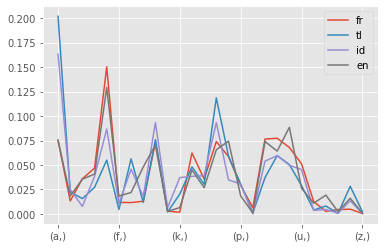

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# アルファベットの出現頻度データを読み込む
with open('./data/lang/freq.json', 'r', encoding='utf-8') as fp:
    freq = json.load(fp)

# 言語ごとに集計
lang_dic = {}
for i, lbl in enumerate(freq[0]['labels']):
    fq = freq[0]['freqs'][i]
    if not (lbl in lang_dic):
        lang_dic[lbl] = fq
        continue
    for idx, v in enumerate(fq):
        lang_dic[lbl][idx] = (lang_dic[lbl][idx]+ v) / 2

# PandasのDataFrameにデータを入れる
asclist = [[chr(n) for n in range(97,97+26)]] # unicode point: 97-a, 123-z
df = pd.DataFrame(lang_dic, index=asclist)

# # プロット
# plt.style.use('ggplot')
# df.plot(kind='bar', subplots=True, ylim=(0,0.15))
# plt.savefig('./data/lang/lang-plot.png')

# プロット
plt.style.use('ggplot')
df.plot(kind='line')
plt.show()

In [12]:
# 学習済みのパラメータを保存する
from sklearn import svm
from sklearn.externals import joblib
import json

# 各言語の頻出データ(JSON)を読み込む
with open('./data/lang/freq.json', 'r', encoding='utf-8') as fp:
    d = json.load(fp)
    data = d[0]

# データを学習する
clf = svm.SVC()
clf.fit(data['freqs'], data['labels'])

# 学習データを保存する
joblib.dump(clf, './data/lang/cgi-bin/freq.pkl')
print('ok')


ok
